# Написание функций для работы с sqlite с использованием python

In [1]:
%load_ext sql
%sql sqlite:///base.db

In [3]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [5]:
#список стран
countries = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Anguilla", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh",
             "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia",
             "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czech Republic",
             "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "Eritrea", "Estonia", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana",
             "Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran",
             "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Latvia", "Lebanon", "Lesotho", "Liberia", "Lithuania",
             "Luxembourg", "Macao", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Martinique", "Mauritania", "Mauritius", "Mayotte", "Mexico", "Micronesia", "Moldova",
             "Monaco", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman",
             "Pakistan", "Palau", "Palestinian Territory", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico", "Qatar", "Republic of Korea", "Romania",
             "Russian Federation", "Rwanda", "Saudi Arabia", "Senegal", "Serbia", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "South Africa", "Spain", "Sudan", "Swaziland", "Sweden", "Switzerland",
             "Syrian Arab Republic", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tokelau", "Tonga", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
             "United Kingdom", "United States of America", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

Лабораторная посвящена базе данных, связанной со спортивными командами. Схема расположена на картинке ниже.

## Схема
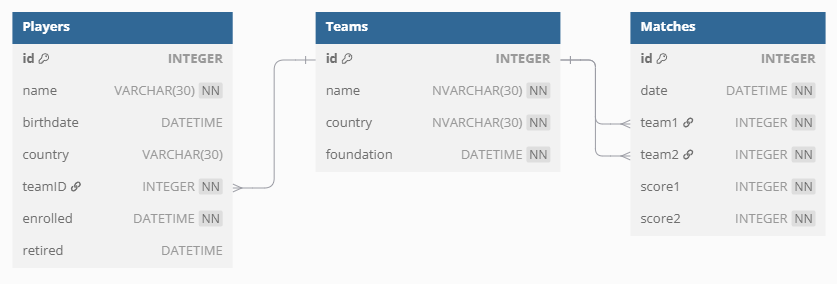

Foundation - дата основания

**Имя команды сделать unique**

# Задание 1
Реализовать таблицы со связями по схеме выше. Добавьте несколько команд и матчей между ними (через INSERT).

In [7]:
%%sql
Pragma foreign_keys=on;

DROP TABLE if exists Players;
DROP TABLE if exists Matches;
DROP TABLE if exists Teams;

CREATE TABLE Teams (
    team_id integer NOT NULL Primary key,
    team_name nvarchar(30) NOT NULL UNIQUE, 
    country nvarchar(30) NOT NULL, 
    foundation datetime NOT NULL
);

CREATE TABLE Players (
    player_id integer NOT NULL Primary key,
    player_name varchar(30) NOT NULL,
    birthdate datetime,
    country varchar(30),
    teamID integer NOT NULL,
    enrolled datetime NOT NULL, 
    retired datetime,
    FOREIGN KEY (teamID) REFERENCES Teams(team_id)
);

CREATE TABLE Matches (
    match_id integer NOT NULL Primary key,
    date datetime NOT NULL,
    team1 integer NOT NULL,
    team2 integer NOT NULL,
    score1 integer NOT NULL,
    score2 integer NOT NULL,
    FOREIGN KEY (team1) REFERENCES Teams(team_id),
    FOREIGN KEY (team2) REFERENCES Teams(team_id)
);

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [9]:
%%sql

INSERT INTO Teams (team_name, country, foundation) VALUES ("A", "Denmark", "1999-03-03");
INSERT INTO Teams (team_name, country, foundation) VALUES ("B", "Norway", "2001-04-05");
INSERT INTO Teams (team_name, country, foundation) VALUES ("C", "Sweden", "1988-12-11");

 * sqlite:///base.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [11]:
%%sql
select * from Teams;

 * sqlite:///base.db
Done.


team_id,team_name,country,foundation
1,A,Denmark,1999-03-03
2,B,Norway,2001-04-05
3,C,Sweden,1988-12-11


In [13]:
%%sql
INSERT INTO Matches (date, team1, team2, score1, score2) VALUES ("2016-02-01", 1, 2, 4, 2);
INSERT INTO Matches (date, team1, team2, score1, score2) VALUES ("2016-02-05", 2, 3, 1, 1);
INSERT INTO Matches (date, team1, team2, score1, score2) VALUES ("2016-06-07", 1, 3, 3, 5);
INSERT INTO Matches (date, team1, team2, score1, score2) VALUES ("2016-06-08", 1, 2, 0, 2);

 * sqlite:///base.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [15]:
%%sql
select * from Matches;

 * sqlite:///base.db
Done.


match_id,date,team1,team2,score1,score2
1,2016-02-01,1,2,4,2
2,2016-02-05,2,3,1,1
3,2016-06-07,1,3,3,5
4,2016-06-08,1,2,0,2


# Задание 2

Написать функцию, осуществляющую добавление нового игрока в таблицу игроков.

На входе имя, дата рождения, страна, **имя команды**, дата перехода в команду, дата увольнения (необязательный параметр). Предусмотреть различные ошибки (такие как неверное название команды (игрока нельзя добавить, если его команды нет в таблице команд), возраст < 0 и т.п.)

После написания функции необходимо добавить несколько игроков.

In [17]:
import sqlite3
connection = sqlite3.connect('base.db')

In [19]:
from datetime import datetime

In [21]:
type(connection)

sqlite3.Connection

In [23]:
cur = connection.cursor()

In [ ]:
#input data - connect, name, birthdate, country, team_name, enrolled, retired=""

In [25]:
def check_country(country):
    if country in countries:
        return 1
    return 0

In [27]:
def get_teamID(team_name):
    cur = connection.cursor()
    cur.execute('''select team_id from Teams where team_name = ?''', (team_name))
    try:
        team_id = cur.fetchone()[0]
        return team_id
    except:
        print('Team not found')
        return 0

In [29]:
def check_birthdate(enrolled, birthdate):
    try:
        date_enrolled = datetime.strptime(enrolled, '%Y-%m-%d')
        date_birth = datetime.strptime(birthdate, '%Y-%m-%d')
        datediff = date_enrolled.year - date_birth.year - ((date_enrolled.month, date_enrolled.day) < (date_birth.month, date_birth.day))
        if datediff < 18:
            return 0
        return 1
    except:
        return 0
    else:
        print("No data found")
        return 0

In [31]:
def check_retired(enrolled, retired):
    if retired == "":
        return 1
    try:
        date_enrolled = datetime.strptime(enrolled, '%Y-%m-%d')
        date_retired = datetime.strptime(retired, '%Y-%m-%d')
        datediff = date_retired.year - date_enrolled.year - ((date_retired.month, date_retired.day) < (date_enrolled.month, date_enrolled.day))
        if datediff < 0:
            return 0
        return 1
    except:
        return 0
    else:
        print("No data found")
        return 0

In [33]:
def insert_player(player_name, birthdate, country, team_name, enrolled, retired=""):
    teamID = get_teamID(team_name)
    if check_country(country) == 0:
        print('wrong country')
        return 0
    if check_birthdate(enrolled, birthdate) == 0:
        print("Age is less 18")
        return 0
    if check_retired(enrolled, retired) == 0:
        print("retired less than enrolled")
        return 0
    cur.execute('''
        INSERT INTO Players(player_name, birthdate, country, teamID, enrolled, retired)
        VALUES(?,?,?,?,?,?)''', (player_name,birthdate,country,teamID,enrolled,retired))
    connection.commit()

In [35]:
insert_player("Emil", '1992-04-07', 'Norway', "B", '2010-09-09');
insert_player("Peter", '1982-04-07', 'Norway', "B", '2001-04-05', '2005-06-06');

In [37]:
%%sql
select * from Players;

 * sqlite:///base.db
Done.


player_id,player_name,birthdate,country,teamID,enrolled,retired
1,Emil,1992-04-07,Norway,2,2010-09-09,
2,Peter,1982-04-07,Norway,2,2001-04-05,2005-06-06


In [39]:
insert_player("Emil", '1992-04-07', 'Norway', "B", '2010-09-09', '2000-09-09');
insert_player("Peter", '2025-04-07', 'Norway', "B", '2001-04-05', '2005-06-06');
insert_player("Emil", '1992-04-07', 'Norwy', "B", '2010-09-09');

retired less than enrolled
Age is less 18
wrong country


# Задание 3
Написать функцию player_stat, которая получает на вход имя игрока и выдает количество побед, ничей и поражений этого игрока (учитывать, что до и после найма игрока успехи его команды не учитываются).
Вывести статистику по игрокам.

In [51]:
def player_stat(player_name):
    cur.execute('''select teamID from Players where player_name = ?''', (player_name, ))
    player_team_id = cur.fetchone()[0]
    if player_team_id is None:
        print('No player with such name')
        return 
    cur.execute('''select sum(case when(team1 = ? and score1 > score2) or (team2 = ? and score2 > score1)
    then 1 else 0 end) as wins,
    sum(case when(team1 = ? and score1 < score2) or (team2 = ? and score2 < score1)
    then 1 else 0 end) as loses,
    sum(case when(team1 = ? and score1 = score2) or (team2 = ? and score1 = score2) then 1 else 0 end) as draws
    from Matches where team1 = ? or team2 = ?''', (player_team_id, player_team_id, player_team_id, player_team_id, player_team_id, player_team_id, player_team_id, player_team_id))

    res = cur.fetchone()
    wins, loses, draws = res if res else (0, 0,  0)
    df = pd.DataFrame({'Loses': [loses], 'Draws': [draws], 'Wins': [wins]}, index=[player_name])
    ax = df.plot.bar(rot=0)

In [45]:
def player_stat1(player_name):
    cur.execute('''select teamID from Players where player_name = ?''', (player_name, ))
    player_team_id = cur.fetchone()[0]
    if player_team_id is None:
        print('No player with such name')
        return 
    return player_team_id

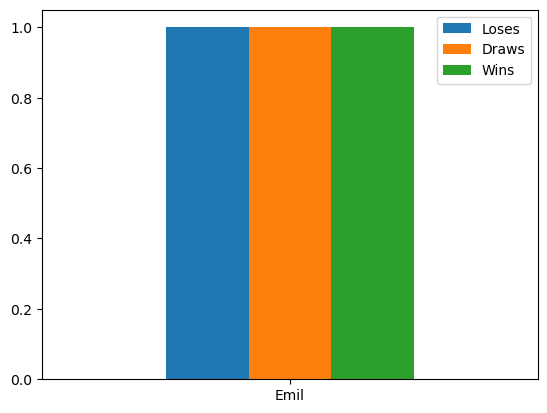

In [57]:
player_stat('Emil')

In [61]:
insert_player("William", '1995-04-07', 'Norway', "A", '2014-11-10');

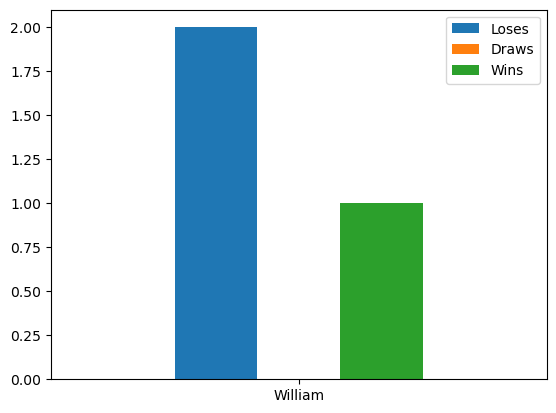

In [63]:
player_stat('William')

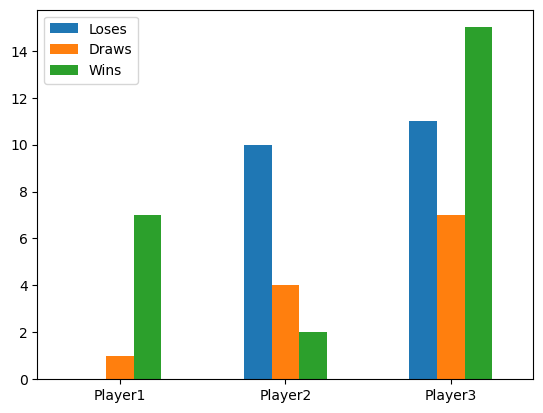

In [59]:
#Пример статистики
import matplotlib.pyplot as plt
import pandas as pd

players = ['Player1','Player2','Player3']
wins = [7, 2, 15]
draws = [1, 4, 7]
loses = [0, 10, 11]

df = pd.DataFrame({'Loses': loses, 'Draws': draws, 'Wins': wins}, index=players)
ax = df.plot.bar(rot=0)